<a href="https://colab.research.google.com/github/faezesarlakifar/Unibo-FAIKR-M3-project/blob/main/Diabetes_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @markdown Install Necessary Libraries
!pip install -q pandas numpy pgmpy scikit-learn networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.9 MB/s eta 0:00:00


In [35]:
!apt-get install -q graphviz libgraphviz-dev pkg-config

Reading package lists...
Building dependency tree...
Reading state information...
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [36]:
!pip install -q pygraphviz

In [ ]:
# @markdown Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Load Dataset
import pandas as pd

file_path = "/content/drive/My Drive/diabetes_indicators.csv"

df = pd.read_csv(file_path)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
2,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
3,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
4,1.0,1.0,0.0,1.0,47.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


In [ ]:
# @markdown Get Features
columns = df.columns

columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
# @title Discretize Continuous Variables
df['BMI'] = pd.cut(df['BMI'], bins=3, labels=[0, 1, 2])  # Low, Medium, High
df['Age'] = pd.cut(df['Age'], bins=3, labels=[0, 1, 2])  # Young, Middle, Old
df['MentHlth'] = pd.cut(df['MentHlth'], bins=2, labels=[0, 1])  # Good, Bad
df['PhysHlth'] = pd.cut(df['PhysHlth'], bins=2, labels=[0, 1])  # Good, Bad

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       70692 non-null  float64 
 1   HighBP                70692 non-null  float64 
 2   HighChol              70692 non-null  float64 
 3   CholCheck             70692 non-null  float64 
 4   BMI                   70692 non-null  category
 5   Smoker                70692 non-null  float64 
 6   Stroke                70692 non-null  float64 
 7   HeartDiseaseorAttack  70692 non-null  float64 
 8   PhysActivity          70692 non-null  float64 
 9   Fruits                70692 non-null  float64 
 10  Veggies               70692 non-null  float64 
 11  HvyAlcoholConsump     70692 non-null  float64 
 12  AnyHealthcare         70692 non-null  float64 
 13  NoDocbcCost           70692 non-null  float64 
 14  GenHlth               70692 non-null  float64 
 15  Me

# Design Bayesian Network Manually Based on Domain Knowledge (Literature)

In [ ]:
from pgmpy.models import BayesianNetwork

bn = BayesianNetwork([

    # Blood pressure, cholesterol & heart disease
    ("HighBP", "HeartDiseaseorAttack"),
    ("HighChol", "HeartDiseaseorAttack"),

    # Age-related health risks
    ("Age", "HighBP"),
    ("Age", "HighChol"),
    # ("Age", "HeartDiseaseorAttack"),

    # Heart disease & diabetes link
    ("HeartDiseaseorAttack", "Diabetes_binary"),

    # Diet affecting BMI
    ("Fruits", "BMI"),
    ("Veggies", "BMI"),
    ("Age", "BMI"),
    ("PhysActivity", "BMI"),
    ("BMI", "Diabetes_binary"),
    ("PhysActivity", "Diabetes_binary"),

    # Lifestyle & physical health
    ("Stroke", "PhysHlth"),
    ("DiffWalk", "PhysActivity"),
    ("PhysHlth", "PhysActivity"),

    # Healthcare access & diabetes
    ("Inocme", "NoDocbcCost"),
    ("NoDocbcCost", "Diabetes_binary"),
    ("AnyHealthcare", "Diabetes_binary"),
])

print("Final Bayesian Network defined successfully!")

Final Bayesian Network defined successfully!


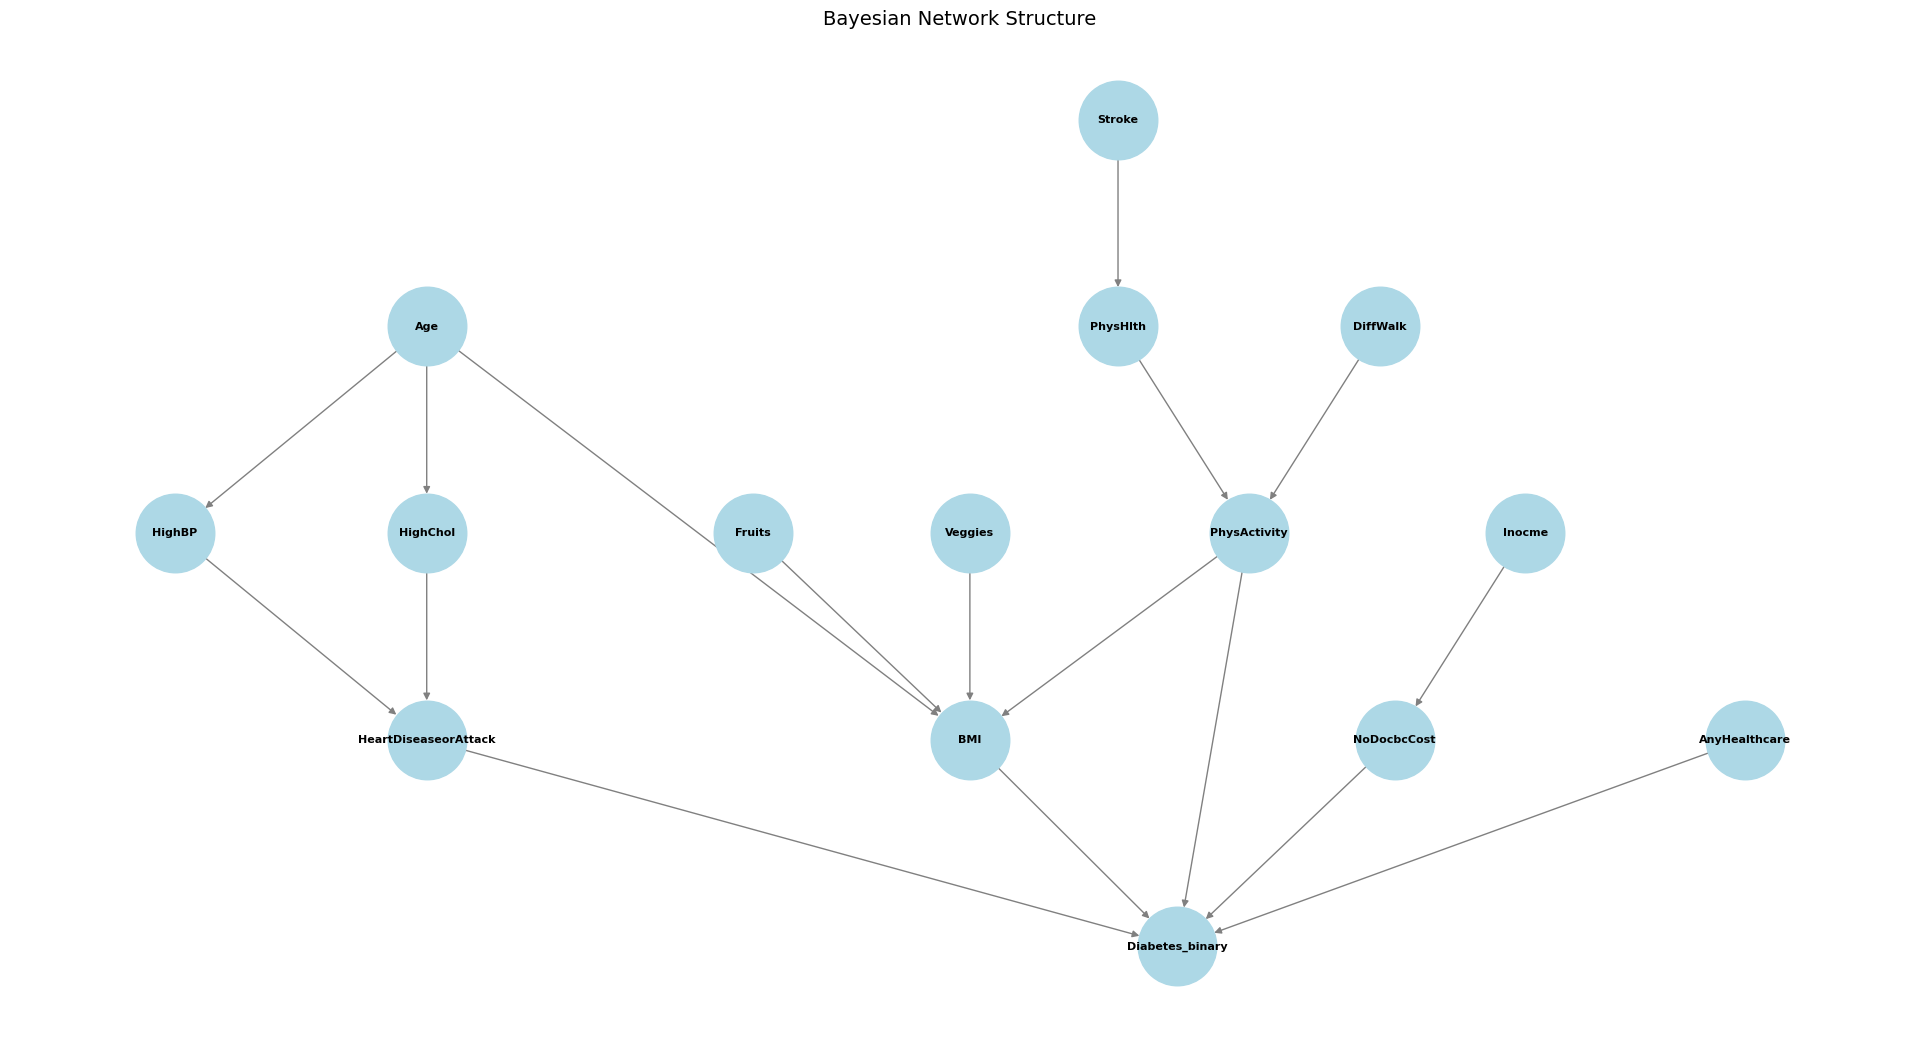

In [ ]:
# @title Plot my thoughts
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Convert BN to a networkx graph
G = nx.DiGraph()
G.add_edges_from(bn.edges())

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

# Draw the Bayesian Network
plt.figure(figsize=(19, 10))
# pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3200, node_color="lightblue", edge_color="gray", font_size=8, font_weight="bold")
plt.title("Bayesian Network Structure", fontsize=14)
plt.show()


# Use Hill Climbing Search to find Causal Relations

In [ ]:
from pgmpy.estimators import HillClimbSearch, BicScore

hc = HillClimbSearch(df)
best_model = hc.estimate(scoring_method=BicScore(df))

# Print learned edges
print(best_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'CholCheck'), ('Diabetes_binary', 'HvyAlcoholConsump'), ('Diabetes_binary', 'BMI'), ('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('HighBP', 'CholCheck'), ('HighBP', 'Stroke'), ('Smoker', 'Education'), ('Smoker', 'Sex'), ('Smoker', 'GenHlth'), ('Smoker', 'HvyAlcoholConsump'), ('Smoker', 'HeartDiseaseorAttack'), ('Smoker', 'Age'), ('HeartDiseaseorAttack', 'Stroke'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('PhysActivity', 'PhysHlth'), ('Fruits', 'Veggies'), ('Fruits', 'PhysActivity'), ('Fruits', 'Smoker'), ('Fruits', 'Sex'), ('Fruits', 'Education'), ('Veggies', 'PhysActivity'), ('Veggies', 'Income'), ('AnyHealthcare', 'CholCheck'), ('NoDocbcCost', 'AnyHealthcare'), ('NoDocbcCost', 'CholCheck'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'PhysActivity'), ('GenHlth', 'MentHlth'), ('GenHlth', 'PhysHl

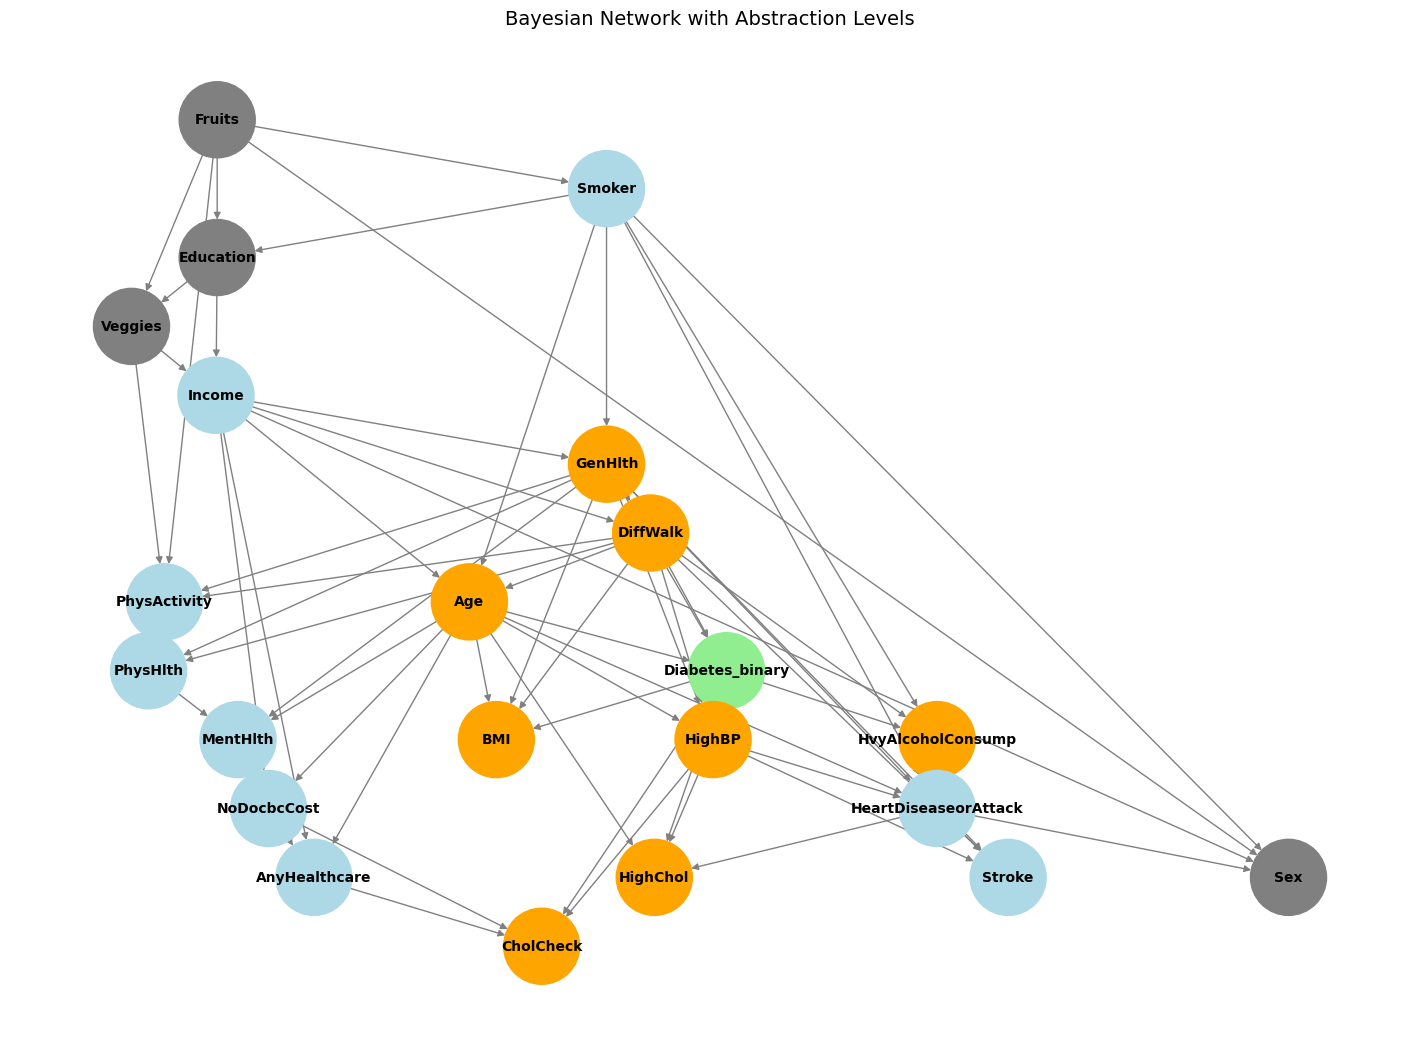

In [32]:
# @title Plot found causal relations
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

plt.figure(figsize=(14, 10))
nx.draw(
    G, pos, with_labels=True,
    node_size=3000,
    node_color=[node_colors[n] for n in G.nodes()],
    font_size=10,
    edge_color="gray",
    font_weight="bold",
    arrows=True
)

plt.title("Bayesian Network with Abstraction Levels", fontsize=14)
plt.show()

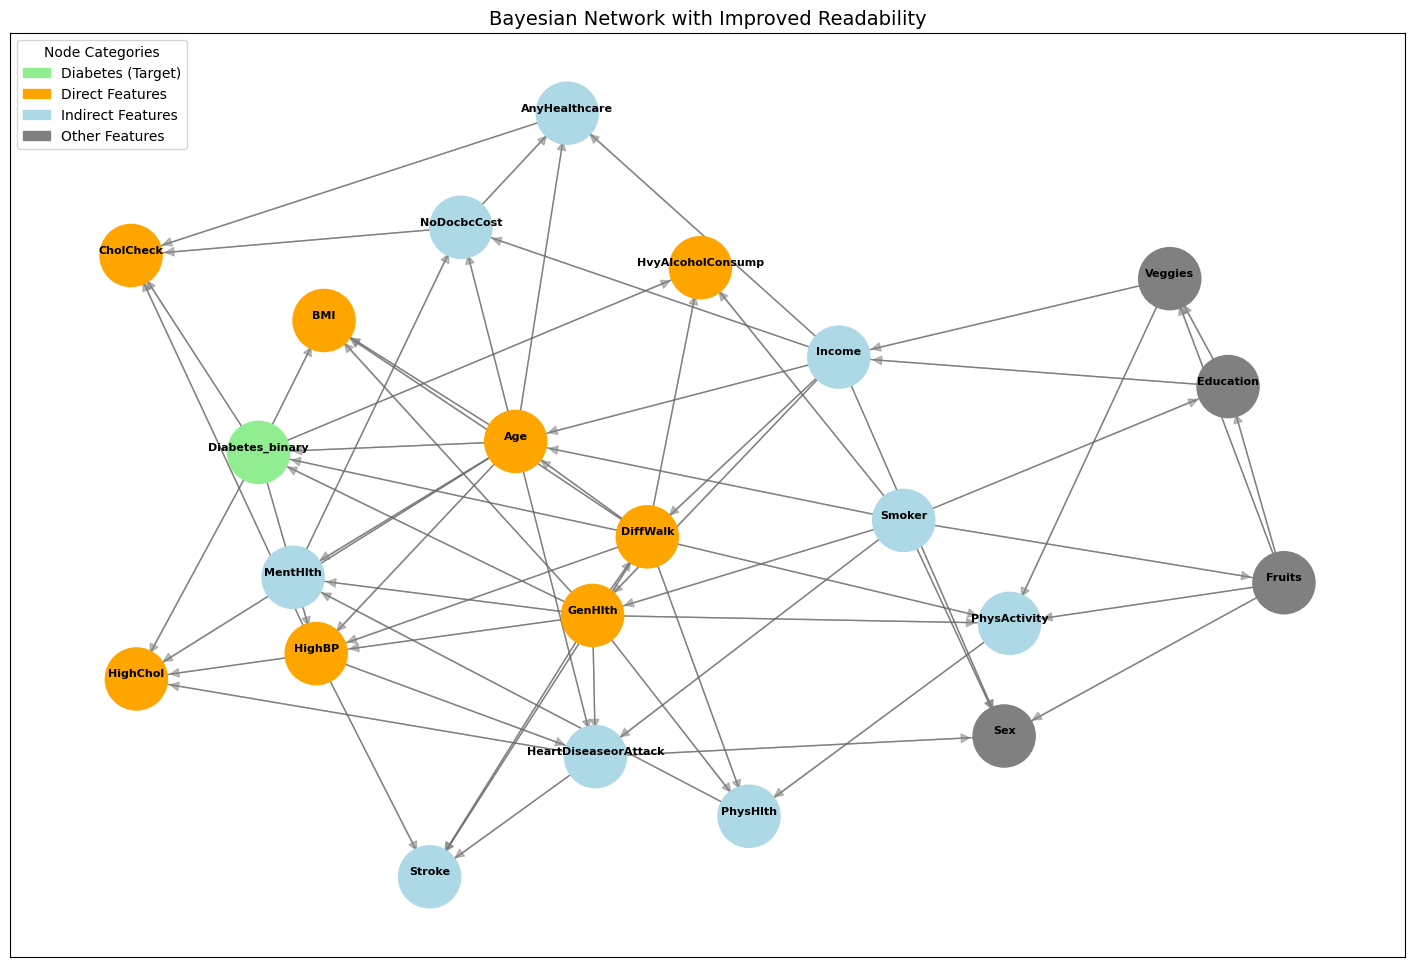

In [ ]:
# @title Plot found causal relations (Better View)
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Bayesian Network with Improved Readability", fontsize=14)

plt.show()

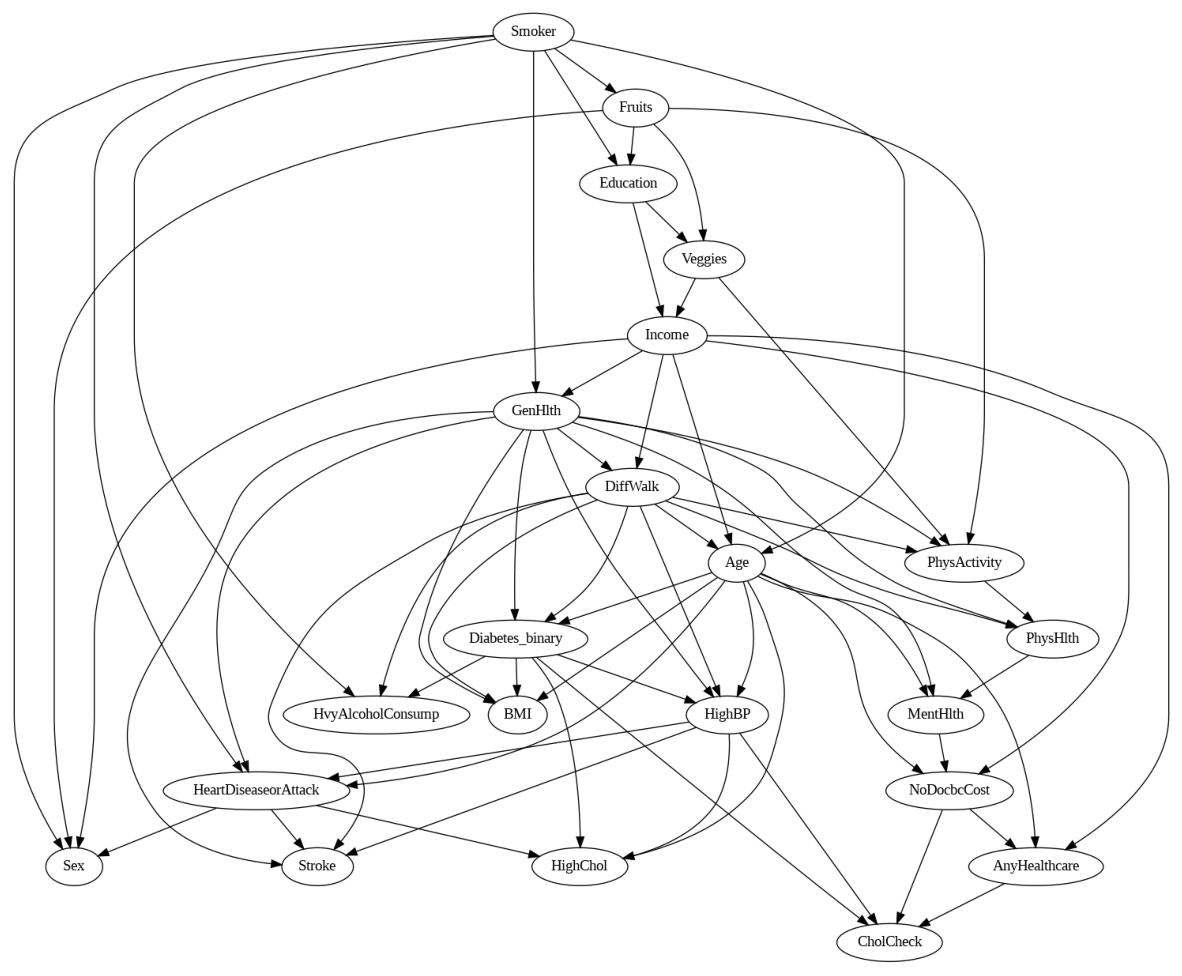

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from networkx.drawing.nx_agraph import to_agraph

# Convert NetworkX graph to PyGraphviz AGraph (forces proper arrow rendering)
A = to_agraph(G)

# Use "fdp" layout for better spacing (or "dot" for tree-like structure)
A.layout(prog="dot")

A.draw("bayesian_network.png")

plt.figure(figsize=(15, 15))
img = plt.imread("bayesian_network.png")
plt.imshow(img)
plt.axis("off")
plt.show()


# Understanding Feature Contributions with SHAP

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Fix categorical columns for XGBoost
for col in ['BMI', 'MentHlth', 'PhysHlth', 'Age']:
    df[col] = df[col].astype(float)

X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize for Neural Network & Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", enable_categorical=False, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Train Models
for name, model in models.items():
    print(f"Training {name}...")
    if name in ["Neural Network", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

# Compute SHAP Values & Plot for Each Model
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    print(f"Computing SHAP for {name}...")

    # Choose correct SHAP explainer
    if name in ["Random Forest", "XGBoost"]:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    elif name == "Logistic Regression":
        explainer = shap.LinearExplainer(model, X_train_scaled)
        shap_values = explainer.shap_values(X_test_scaled)
    elif name == "Neural Network":
        explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled[:100])  # Use sample due to slow computation
        shap_values = explainer.shap_values(X_test_scaled[:100])

    # SHAP Summary Plot
    shap.summary_plot(shap_values, X_test if name in ["Random Forest", "XGBoost"] else X_test_scaled,
                      show=False, ax=axes[i])
    axes[i].set_title(f"SHAP for {name}")

plt.tight_layout()
plt.show()

Training Random Forest...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:59:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...
Training Neural Network...
Computing SHAP for Random Forest...


# Parameter Learning (Estimate Probabilities)

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Define the Bayesian Model with learned structure
from pgmpy.models import BayesianNetwork
model = BayesianNetwork(best_model.edges())

# Learn CPDs
model.fit(df, estimator=MaximumLikelihoodEstimator)

for cpd in model.cpds:
    print(cpd)

+----------------------+--------------------+-----+---------------------+---------------------+
| Age                  | Age(0)             | ... | Age(2)              | Age(2)              |
+----------------------+--------------------+-----+---------------------+---------------------+
| DiffWalk             | DiffWalk(0.0)      | ... | DiffWalk(1.0)       | DiffWalk(1.0)       |
+----------------------+--------------------+-----+---------------------+---------------------+
| GenHlth              | GenHlth(1.0)       | ... | GenHlth(4.0)        | GenHlth(5.0)        |
+----------------------+--------------------+-----+---------------------+---------------------+
| Diabetes_binary(0.0) | 0.9702970297029703 | ... | 0.20440821256038647 | 0.17121588089330025 |
+----------------------+--------------------+-----+---------------------+---------------------+
| Diabetes_binary(1.0) | 0.0297029702970297 | ... | 0.7955917874396136  | 0.8287841191066998  |
+----------------------+----------------

## Simple Inference

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

# Example: P(Diabetes | HighBP=1, BMI=High)
prob_diabetes = inference.query(variables=["Diabetes_binary"], evidence={"HighBP": 1, "BMI": 2})
print(prob_diabetes)


+----------------------+------------------------+
| Diabetes_binary      |   phi(Diabetes_binary) |
+======================+========================+
| Diabetes_binary(0.0) |                 0.2955 |
+----------------------+------------------------+
| Diabetes_binary(1.0) |                 0.7045 |
+----------------------+------------------------+


## Visualize CPDs

In [ ]:
print(model.get_cpds("Diabetes_binary"))

+----------------------+--------------------+-----+---------------------+---------------------+
| Age                  | Age(0)             | ... | Age(2)              | Age(2)              |
+----------------------+--------------------+-----+---------------------+---------------------+
| DiffWalk             | DiffWalk(0.0)      | ... | DiffWalk(1.0)       | DiffWalk(1.0)       |
+----------------------+--------------------+-----+---------------------+---------------------+
| GenHlth              | GenHlth(1.0)       | ... | GenHlth(4.0)        | GenHlth(5.0)        |
+----------------------+--------------------+-----+---------------------+---------------------+
| Diabetes_binary(0.0) | 0.9702970297029703 | ... | 0.20440821256038647 | 0.17121588089330025 |
+----------------------+--------------------+-----+---------------------+---------------------+
| Diabetes_binary(1.0) | 0.0297029702970297 | ... | 0.7955917874396136  | 0.8287841191066998  |
+----------------------+----------------

In [ ]:
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cpd_diabetes = model.get_cpds("Diabetes_binary")

parents = cpd_diabetes.variables[1:]
parent_cardinalities = cpd_diabetes.cardinality[1:]

# Generate all possible parent state combinations
parent_states = list(itertools.product(*[range(c) for c in parent_cardinalities]))

cpd_df = pd.DataFrame(
    cpd_diabetes.values.reshape(len(parent_states), -1),  # Reshape CPD values
    columns=["Diabetes=0", "Diabetes=1"],  # Column names
)[["Diabetes=1"]]  # Select Diabetes=1

# Create meaningful row labels by combining parent feature names and states
cpd_df.index = [
    ", ".join(f"{feature}={state}" for feature, state in zip(parents, state_comb))
    for state_comb in parent_states
]

cpd_df

,Diabetes=1
"Age=0, DiffWalk=0, GenHlth=0",0.905040
"Age=0, DiffWalk=0, GenHlth=1",0.487377
"Age=0, DiffWalk=0, GenHlth=2",0.650000
"Age=0, DiffWalk=0, GenHlth=3",0.545064
"Age=0, DiffWalk=0, GenHlth=4",0.307359
"Age=0, DiffWalk=1, GenHlth=0",0.721383
"Age=0, DiffWalk=1, GenHlth=1",0.289092
"Age=0, DiffWalk=1, GenHlth=2",0.602273
"Age=0, DiffWalk=1, GenHlth=3",0.331162
"Age=0, DiffWalk=1, GenHlth=4",0.205699


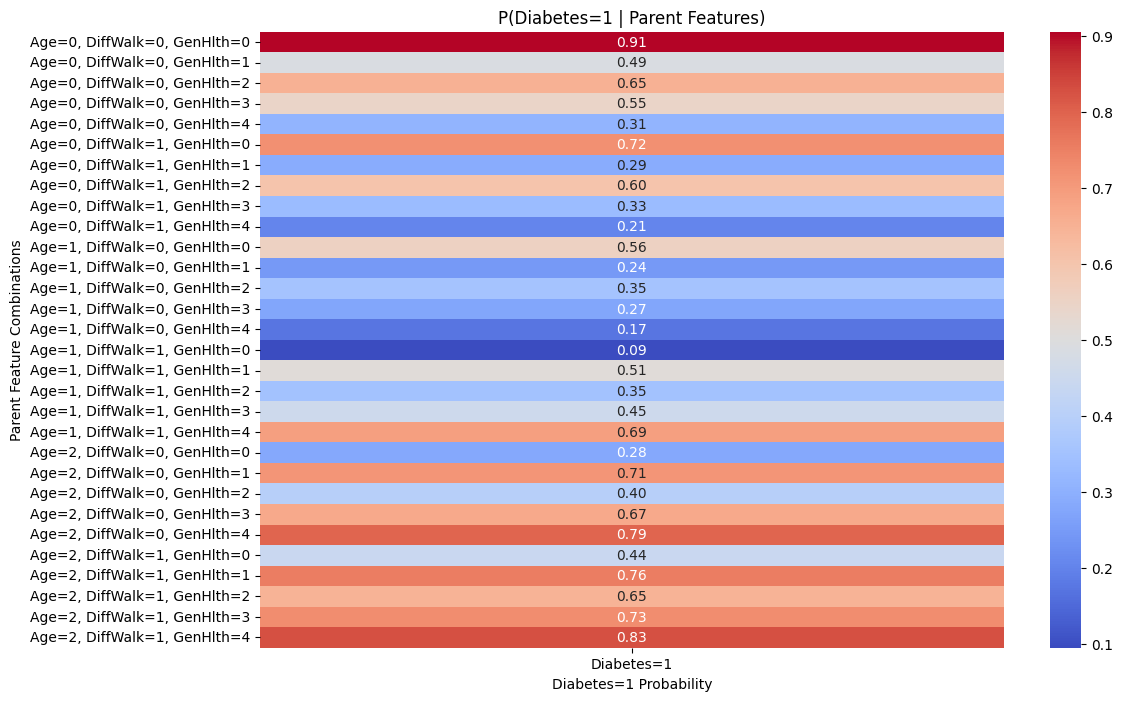

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cpd_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("P(Diabetes=1 | Parent Features)")
plt.xlabel("Diabetes=1 Probability")
plt.ylabel("Parent Feature Combinations")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

# More advance

## Use Simulated Annealing for Bayesian Network Learning

In [ ]:
from pgmpy.estimators import HillClimbSearch, BicScore
import networkx as nx
import matplotlib.pyplot as plt
import random

hc = HillClimbSearch(df)

temperature = 1.0  # Start high
cooling_rate = 0.95  # Reduce over iterations
best_model_sa = None
best_score = float('-inf')

for i in range(100):
    print(f"Iteration {i+1}: Temperature = {temperature:.4f}")

    current_model = hc.estimate(scoring_method=BicScore(df))
    current_score = BicScore(df).score(current_model)

    # Accept or reject move based on Simulated Annealing logic
    if current_score > best_score or random.uniform(0, 1) < temperature:
        best_model_sa = current_model
        best_score = current_score

    # Reduce temperature (cooling)
    temperature *= cooling_rate

print("\nLearned Bayesian Network Structure (Edges):")
print(best_model_sa.edges())

Iteration 1: Temperature = 1.0000


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 2: Temperature = 0.9500


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 3: Temperature = 0.9025


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 4: Temperature = 0.8574


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 5: Temperature = 0.8145


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 6: Temperature = 0.7738


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 7: Temperature = 0.7351


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 8: Temperature = 0.6983


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 9: Temperature = 0.6634


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 10: Temperature = 0.6302


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 11: Temperature = 0.5987


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 12: Temperature = 0.5688


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 13: Temperature = 0.5404


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 14: Temperature = 0.5133


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 15: Temperature = 0.4877


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 16: Temperature = 0.4633


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 17: Temperature = 0.4401


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 18: Temperature = 0.4181


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 19: Temperature = 0.3972


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 20: Temperature = 0.3774


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 21: Temperature = 0.3585


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 22: Temperature = 0.3406


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 23: Temperature = 0.3235


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 24: Temperature = 0.3074


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 25: Temperature = 0.2920


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 26: Temperature = 0.2774


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 27: Temperature = 0.2635


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 28: Temperature = 0.2503


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 29: Temperature = 0.2378


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 30: Temperature = 0.2259


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 31: Temperature = 0.2146


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 32: Temperature = 0.2039


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 33: Temperature = 0.1937


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 34: Temperature = 0.1840


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 35: Temperature = 0.1748


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 36: Temperature = 0.1661


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 37: Temperature = 0.1578


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 38: Temperature = 0.1499


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 39: Temperature = 0.1424


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 40: Temperature = 0.1353


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 41: Temperature = 0.1285


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 42: Temperature = 0.1221


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 43: Temperature = 0.1160


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 44: Temperature = 0.1102


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 45: Temperature = 0.1047


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 46: Temperature = 0.0994


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 47: Temperature = 0.0945


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 48: Temperature = 0.0897


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 49: Temperature = 0.0853


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 50: Temperature = 0.0810


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 51: Temperature = 0.0769


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 52: Temperature = 0.0731


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 53: Temperature = 0.0694


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 54: Temperature = 0.0660


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 55: Temperature = 0.0627


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 56: Temperature = 0.0595


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 57: Temperature = 0.0566


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 58: Temperature = 0.0537


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 59: Temperature = 0.0510


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 60: Temperature = 0.0485


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 61: Temperature = 0.0461


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 62: Temperature = 0.0438


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 63: Temperature = 0.0416


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 64: Temperature = 0.0395


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 65: Temperature = 0.0375


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 66: Temperature = 0.0356


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 67: Temperature = 0.0339


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 68: Temperature = 0.0322


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 69: Temperature = 0.0306


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 70: Temperature = 0.0290


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 71: Temperature = 0.0276


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 72: Temperature = 0.0262


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 73: Temperature = 0.0249


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 74: Temperature = 0.0236


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 75: Temperature = 0.0225


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 76: Temperature = 0.0213


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 77: Temperature = 0.0203


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 78: Temperature = 0.0193


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 79: Temperature = 0.0183


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 80: Temperature = 0.0174


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 81: Temperature = 0.0165


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 82: Temperature = 0.0157


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 83: Temperature = 0.0149


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 84: Temperature = 0.0142


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 85: Temperature = 0.0135


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 86: Temperature = 0.0128


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 87: Temperature = 0.0121


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 88: Temperature = 0.0115


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 89: Temperature = 0.0110


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 90: Temperature = 0.0104


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 91: Temperature = 0.0099


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 92: Temperature = 0.0094


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 93: Temperature = 0.0089


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 94: Temperature = 0.0085


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 95: Temperature = 0.0081


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 96: Temperature = 0.0077


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 97: Temperature = 0.0073


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 98: Temperature = 0.0069


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 99: Temperature = 0.0066


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 100: Temperature = 0.0062


  0%|          | 0/1000000 [00:00<?, ?it/s]


Learned Bayesian Network Structure (Edges):
[('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'CholCheck'), ('Diabetes_binary', 'HvyAlcoholConsump'), ('Diabetes_binary', 'BMI'), ('Diabetes_binary', 'Sex'), ('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('HighBP', 'CholCheck'), ('HighBP', 'Stroke'), ('Smoker', 'Education'), ('Smoker', 'Sex'), ('Smoker', 'GenHlth'), ('Smoker', 'HvyAlcoholConsump'), ('Smoker', 'HeartDiseaseorAttack'), ('Smoker', 'Age'), ('Smoker', 'Fruits'), ('HeartDiseaseorAttack', 'Stroke'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('PhysActivity', 'Veggies'), ('PhysActivity', 'Fruits'), ('PhysActivity', 'PhysHlth'), ('Veggies', 'Fruits'), ('AnyHealthcare', 'CholCheck'), ('NoDocbcCost', 'AnyHealthcare'), ('NoDocbcCost', 'CholCheck'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'PhysActivity'), ('GenHlth', 'MentHlth'), ('GenHlth', '

### Save model

In [ ]:
import pickle

with open("best_model_sa.pkl", "wb") as file:
    pickle.dump(best_model_sa, file)

In [ ]:
# @title Plot Configurations
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(best_model_sa.edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

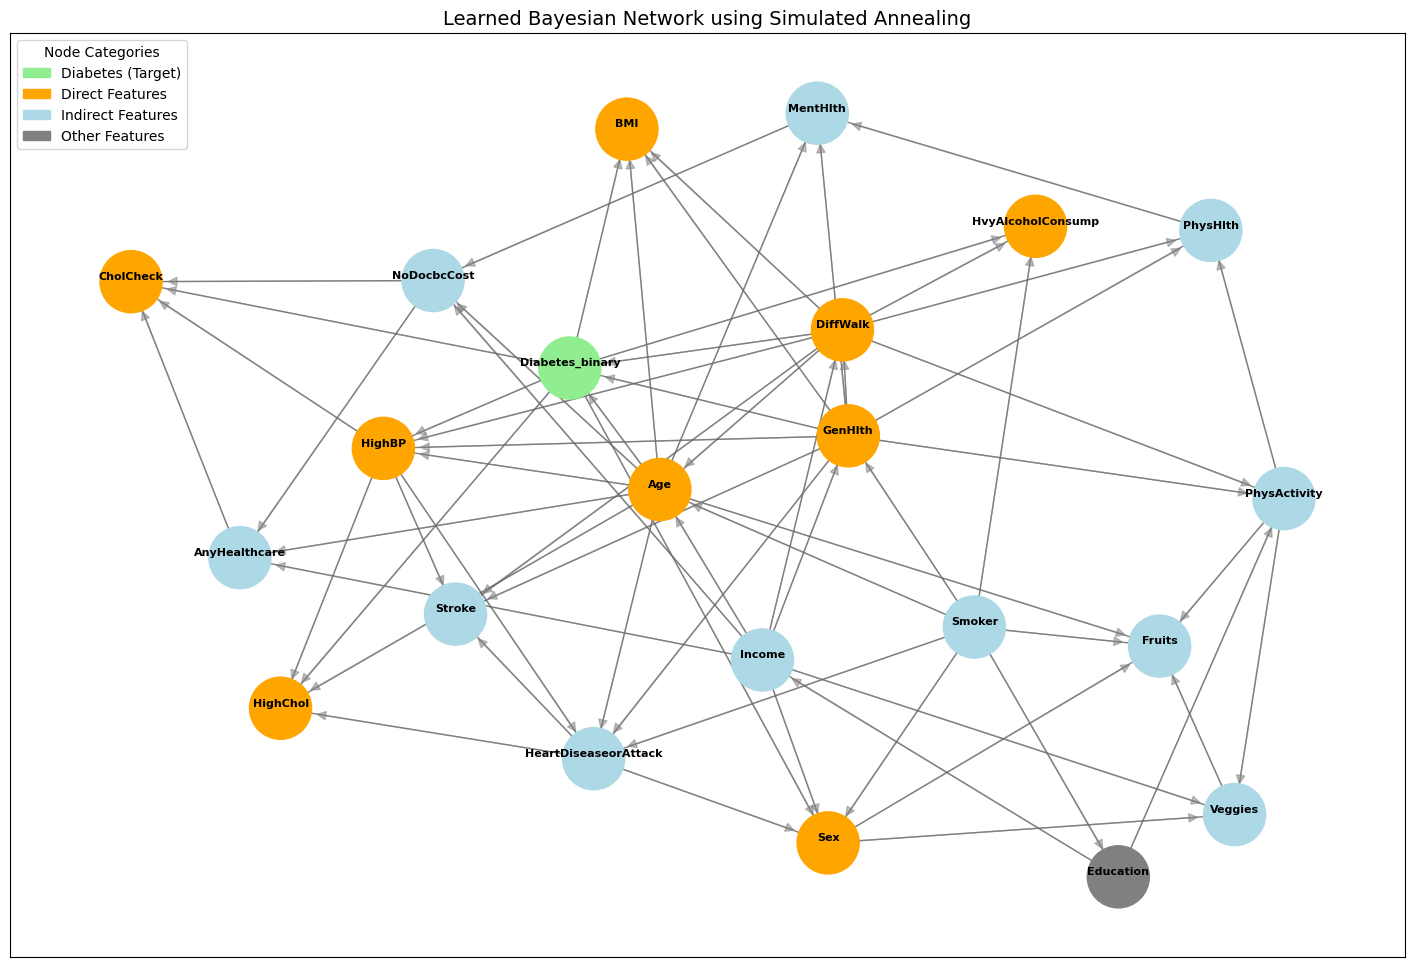

In [ ]:
# @title Plot found causal relations (Better View)
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Learned Bayesian Network using Simulated Annealing", fontsize=14)

plt.show()

## Naïve Bayes Bayesian Network

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

naive_bayes_model = BayesianNetwork([("Diabetes_binary", feature) for feature in df.columns if feature != "Diabetes_binary"])

naive_bayes_model.fit(df, estimator=MaximumLikelihoodEstimator)

print("Naïve Bayes Structure:", naive_bayes_model.edges())

## Hill Climbing with Different Scores

In [ ]:
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, BDeuScore

hc = HillClimbSearch(df)

scores = {"BIC": BicScore(df), "K2": K2Score(df), "BDeu": BDeuScore(df)}

models = {}
for name, score in scores.items():
    print(f"Estimating structure using {name} scoring method...")
    models[name] = hc.estimate(scoring_method=score)
    print(f"{name} Model Edges:", models[name].edges())

## Evaluate Models and Find the Best

In [ ]:
models["Naïve Bayes"] = naive_bayes_model
models["Simulated Annealing"] = best_model_sa

In [ ]:
from sklearn.metrics import roc_auc_score
from pgmpy.inference import VariableElimination

# Function to compute ROC AUC
def evaluate_model(model, df):
    inference = VariableElimination(model)
    y_true = df["Diabetes_binary"]

    # Predict for each row
    y_pred = []
    for _, row in df.iterrows():
        evidence = row.drop("Diabetes_binary").to_dict()
        try:
            pred = inference.map_query(variables=["Diabetes_binary"], evidence=evidence)["Diabetes_binary"]
            y_pred.append(pred)
        except:
            y_pred.append(0)  # Default to 0 if inference fails

    return roc_auc_score(y_true, y_pred)

auc_scores = {}
for name, model in models.items():
    try:
        auc = evaluate_model(model, df)
        auc_scores[name] = auc
        print(f"{name} AUC Score:", auc)
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

# Find the best model
best_model_name = max(auc_scores, key=auc_scores.get)
print(f"\n🔥 Best Model: {best_model_name} with AUC = {auc_scores[best_model_name]}")